# Graded Challenge 4 - Bank Customer Segmentation

_______________________________

# I. Introduction

> - Nama : Nirwan Arrachman
> - Batch : FTDS - 11  
  
Notebook ini bertujuan untuk membuat sebuah model clustering menggunakan dataset yang ada pada Google Cloud Platform untuk melakukan segmentasi nasabah suatu bank sesuai dengan karakteristik penggunaan kartu kreditnya. Dataset pada Google Cloud Platform yang digunakan adalah sebagai berikut:  
  
> - Project ID : `ftds-hacktiv8-project`  
> - Dataset Name : `phase1_assignments`  
> - Table Name : `credit-card-information`

Sebelum mengambil dataset dari Google Cloud Platform, terdapat kriteria yang harus dipenuhi saat akan mengambil dataset, yaitu data yang diambil adalah seluruh data pada kolom `CUST_ID` yang bernilai ganjil. Maka dari itu, untuk memenuhi kriteria tersebut saya memasukan Query pada Google Cloud Platform sebagai berikut:  
  
> SELECT *  
FROM `ftds-hacktiv8-project.phase1_assignments.credit-card-information`  
WHERE MOD(CUST_ID, 2) <> 0;  
  
Hasil query tersebut akan mengambil seluruh data dengan kriteria kolom `CUST_ID` yang bernilai ganjil. Hasil query ini lalu disimpan dalam format csv dengan nama `h8dsft_P1G4_nirwan_arrachman.csv`.

Dataset ini terdiri dari 4.475 baris data dan 18 kolom data. Dataset ini berisi informasi mengenai nasabah suatu bank dengan karakteristik kartu kreditnya. Untuk lebih jelasnya mengenai informasi per kolom data, berikut adalah penjelasan mengenai 18 kolom pada dataset ini:

- CUST_ID : identification of Credit Card Holder
- BALANCE : Balance amount left in their account
- BALANCE_FREQUENCY : How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made
- ONE0FF_PURCHASES : maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY : How frequently purhases are happening in one-go, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
- CASH_ADVANCE_TRX : Number of transactions made with 'cash in advanced'
- PURCHASES_TRX : Number of purchase transactions made
- CREDIT_LIMTI : Limit of credit card for user
- PAYMENTS : Amount of payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRC_FULL_PAYMENT : Percent of full payment paid by user
- TENURE : Tenure of Credit Card service for user

Objective dari notebook ini adalah sebagai berikut:
1. Melakukan EDA dan menemukan insight-insight dari dataset yang digunakan
2. Membuat model Machine Learning Clustering yang dapat melalukan segmentasi nasabah bank
3. Melakukan EDA pada hasil segmentasi menggunakan model Clustering
4. Melakukan model inference pada data inference yang telah dipisahkan

______________________________

# II. Import Libraries

Library yang akan digunakan dalam notebook ini adalah pandas, numpy, matplotlib, seaborn, dan sklearn.

In [1]:
# import library umum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

# model
from sklearn.cluster import KMeans, SpectralClustering as SC, AgglomerativeClustering as AC

# metrics
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
# code untuk menghilangkan warning
from warnings import filterwarnings
filterwarnings('ignore')

_________________________

# III. Data Loading

Data yang digunakan adalah data dengan nama h8dsft_P1G4_nirwan_arrachman.csv dari Google Cloud Platform yang sudah kita filter berdasarkan kriteria di bagian introduction.

In [3]:
# loading data
df = pd.read_csv('h8dsft_P1G4_nirwan_arrachman.csv')

In [4]:
# preview 5 baris data pertama
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [5]:
# preview 5 baris data terakhir
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


In [6]:
# ukuran dimensi dataset
df.shape

(4475, 18)

Dataset ini terdiri dari 4.475 baris data dan 18 kolom data.

In [7]:
# informasi tipe data kolom dan missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Terdapat kolom yang memiliki missing values yaitu pada kolom `MINIMUM_PAYMENTS`. Untuk memudahkan proses selanjutnya, handling missing values akan dilakukan diawal.

### Handling Missing Values

In [8]:
# variabel baru untuk melakukan filter nilai 0 pada kolom `PAYMENTS`
df_no_payments = df[df['PAYMENTS'] == 0]
df_no_payments[['PAYMENTS', 'MINIMUM_PAYMENTS']].head(10)

,PAYMENTS,MINIMUM_PAYMENTS
0,0.0,NaN
1,0.0,NaN
21,0.0,NaN
31,0.0,NaN
79,0.0,NaN
100,0.0,NaN
156,0.0,NaN
260,0.0,NaN
304,0.0,NaN
306,0.0,NaN


Jika kita perhatikan dataframe diatas, ternyata hasil missing value pada kolom `MINIMUM_PAYMENTS` disebabkan karena nilai pada kolom `PAYMENTS` yang bernilai 0. Hal ini cukup wajar karena nasabah yang tidak memiliki nilai pada kolom `PAYMENTS` artinya ia tidak pernah melakukan pembayaran sama sekali, sehingga pada kolom `MINIMUM_PAYMENTS` menjadi missing values. Kesimpulannya kita dapat mengubah nilai missing values pada kolom `MINIMUM_PAYMENTS` menjadi 0 dengan catatan bahwa nasabah tersebut memiliki nilai pada kolom `PAYMENTS` sama dengan 0 juga.

In [9]:
# nomor index dengan nilai 0 pada kolom `PAYMENTS`
df_no_payments.index

Int64Index([   0,    1,   21,   31,   79,  100,  156,  260,  304,  306,
            ...
            4012, 4074, 4078, 4129, 4137, 4268, 4271, 4274, 4276, 4358],
           dtype='int64', length=114)

In [10]:
# list nomor index dengan nilai 0 pada kolom `PAYMENTS`
list_index_no_pay = df_no_payments.index

In [11]:
# replace nilai missing value menjadi 0 sesuai dengan nomor index sebelumnya
df['MINIMUM_PAYMENTS'].loc[list_index_no_pay] = 0

In [12]:
# pengecekan kembali missing values pada kolom `MINIMUM_PAYMENTS`
df['MINIMUM_PAYMENTS'].isnull().sum()

41

Setelah kita berhasil melakukan replace missing values, ternyata masih terdapat 41 baris data pada kolom `MINIMUM_PAYMENTS` yang masih missing values. Karena jumlahnya sangat sedikit, 41 baris data ini akan saya drop langsung karena proporsinya yang sangat kecil terhadap keseluruhan dataset.

In [13]:
# drop missing values
df.dropna(inplace=True)

In [14]:
# pengecekan kembali missing values pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4434 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4434 non-null   int64  
 1   BALANCE                           4434 non-null   float64
 2   BALANCE_FREQUENCY                 4434 non-null   float64
 3   PURCHASES                         4434 non-null   float64
 4   ONEOFF_PURCHASES                  4434 non-null   float64
 5   INSTALLMENTS_PURCHASES            4434 non-null   float64
 6   CASH_ADVANCE                      4434 non-null   float64
 7   PURCHASES_FREQUENCY               4434 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4434 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4434 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4434 non-null   float64
 11  CASH_ADVANCE_TRX                  4434 non-null   int64  
 12  PURCHA

Dataset ini telah berhasil dihandling missing values, selanjutnya dataset ini dapat digunakan dalam Exploratory Data Analysis (EDA).

___________________________

# IV. Exploratory Data Analysis (EDA)

Pada proses EDA ini saya akan melakukan eksplorasi data untuk mendapatkan insight-insight yang bermanfaat dalam dataset ini. Berikut adalah EDA yang akan saya lakukan:

- Melihat distribusi data numerik
- Melihat korelasi kolom `BALANCE` dengan kolom `CREDIT_LIMIT`
- Melihat rata-rata `Balance` berdasarkan lamanya `Tenure`

### Distribusi Data Numerik

Data numerik yang akan saya lihat distribusi datanya adalah pada kolom sebagai berikut:  
- `BALANCE`
- `PURCHASES`
- `CREDIT_LIMIT`
- `PAYMENTS`
- `MINIMUM_PAYMENTS`

In [15]:
# membuat fungsi untuk distribusi data menggunakan histogram dan boxplot
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print('Skewness :', df[col].skew())
    if -0.5 <= df[col].skew() <= 0.5:
        print("Kolom '{}' berdistribusi normal".format(col))
    elif df[col].skew() > 0.5:
        print("Kolom '{}' right skewed (miring ke kanan)".format(col))
    elif df[col].skew() < -0.5:
        print("Kolom '{}' left skewed (miring ke kiri)".format(col))

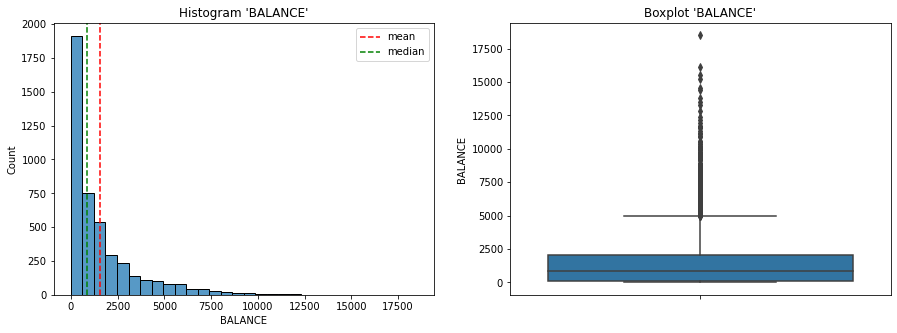

Skewness : 2.319682341233347
Kolom 'BALANCE' right skewed (miring ke kanan)


In [16]:
# fungsi visualisasi distribusi data pada kolom `BALANCE`
plot_dist(df, 'BALANCE')

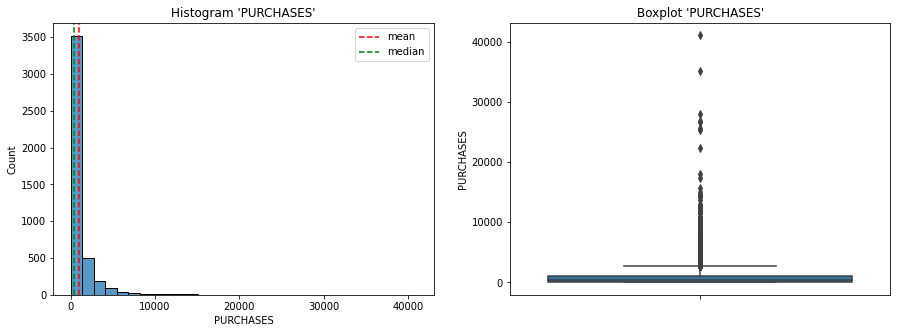

Skewness : 7.045662631677509
Kolom 'PURCHASES' right skewed (miring ke kanan)


In [17]:
# fungsi visualisasi distribusi data pada kolom `PURCHASES`
plot_dist(df, 'PURCHASES')

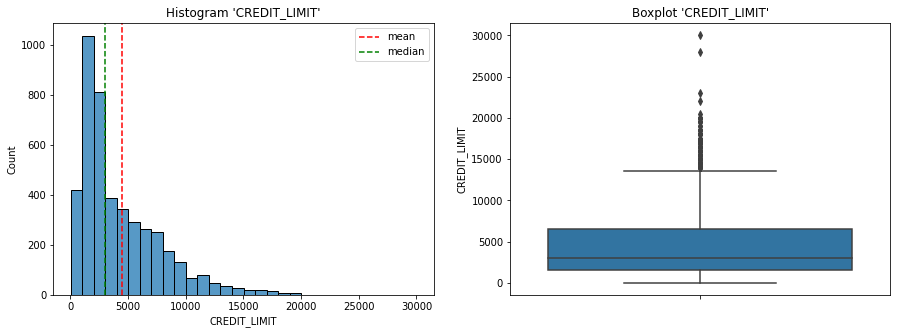

Skewness : 1.494573471269905
Kolom 'CREDIT_LIMIT' right skewed (miring ke kanan)


In [18]:
# fungsi visualisasi distribusi data pada kolom `CREDIT_LIMIT`
plot_dist(df, 'CREDIT_LIMIT')

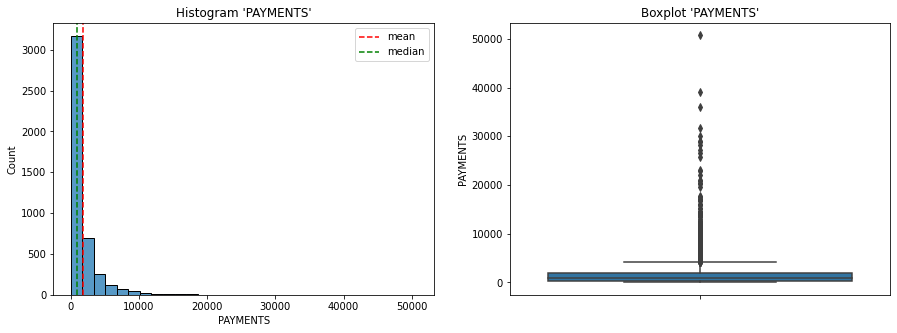

Skewness : 5.749323575569062
Kolom 'PAYMENTS' right skewed (miring ke kanan)


In [19]:
# fungsi visualisasi distribusi data pada kolom `PAYMENTS`
plot_dist(df, 'PAYMENTS')

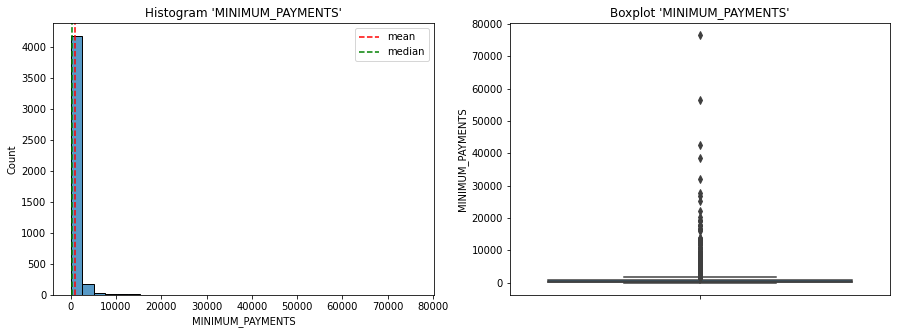

Skewness : 14.815264866133187
Kolom 'MINIMUM_PAYMENTS' right skewed (miring ke kanan)


In [20]:
# fungsi visualisasi distribusi data pada kolom `MINIMUM_PAYMENTS`
plot_dist(df, 'MINIMUM_PAYMENTS')

Terlihat dari beberapa grafik histogram dan boxplot diatas, bahwa distribusi data numerik pada dataset ini hampir seluruhnya berdistribusi tidak normal atau miring ke kanan (right-skewed). Pada grafik histogram data banyak berkumpul disebelah kiri sehingga nilai rata-rata (mean) lebih besar daripada nilai tengahnya (median). Grafik boxplot pun menangkap beberapa outlier diluar batas atasnya (upper boundary).

### Korelasi kolom `BALANCE` dengan kolom `CREDIT_LIMIT`

Pada bagian EDA ini, saya ingin melihat apakah terdapat korelasi antara kolom `BALANCE` dengan kolom `CREDIT_LIMIT`. Apakah pihak bank menetapkan jumlah limit kreditnya berdasarkan jumlah balance atau saldo yang dimiliki oleh nasabah. Untuk dapat melihat korelasinya, saya akan menggunakan scatter plot.

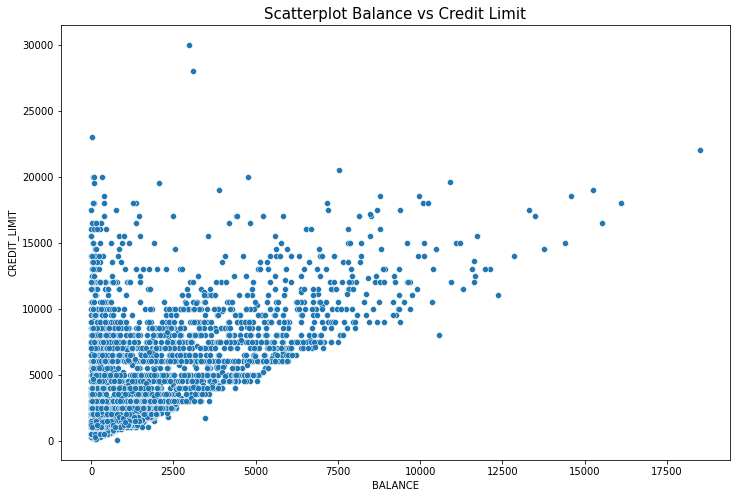

In [21]:
# visualisasi scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='BALANCE', y='CREDIT_LIMIT')
plt.title('Scatterplot Balance vs Credit Limit', size=15)
plt.show()

Hasil scatter plot diatas menunjukan bahwa terdapat korelasi positif antara jumlah saldo yang nasabah miliki dengan limit kreditnya. Semakin tinggi jumlah saldo nasabah, maka semakin tinggi juga jumlah limit kredit yang diberikan. Artinya pihak bank merasa nasabah dengan jumlah saldo yang tinggi maka nasabah tersebut memiliki kemampuan yang lebih dalam menggunakan kartu kreditnya dalam limit yang lebih tinggi, sehingga hal ini wajar dilakukan oleh pihak bank.

### Rata-rata `Balance` berdasarkan lamanya `Tenure`

EDA berikutnya adalah untuk melihat apakah terdapat perbedaan rata-rata saldo nasabah dengan lamanya tenure nasabah.

In [22]:
# variabel untuk barplot data
bar_data = df.groupby('TENURE')['PAYMENTS'].mean()
bar_data

TENURE
6      576.938629
7      469.342741
8      936.090934
9      914.020095
10    1241.010465
11    1783.629550
12    1851.418452
Name: PAYMENTS, dtype: float64

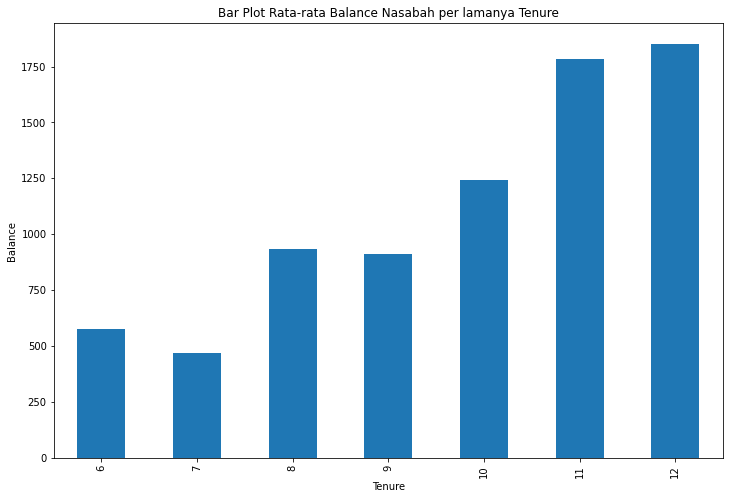

In [23]:
# visualisasi dengan menggunakan barplot
plt.figure(figsize = (12, 8))
bar_data.plot(kind = 'bar')
plt.title('Bar Plot Rata-rata Balance Nasabah per lamanya Tenure')
plt.xlabel('Tenure')
plt.ylabel('Balance')
plt.show()

Hasil barplot diatas menunjukan terdapat perbedaan rata-rata saldo nasabah dengan lamanya tenur. Nasabah dengan tenur yang lebih lama cenderung memiliki jumlah saldo yang lebih banyak daripada nasabah dengan tenur yang lebih baru. Hal ini cukup wajar karena nasabah dengan tenur yang lebih lama memiliki waktu lebih lama untuk menabung sehingga jumlah saldonya akan lebih banyak daripada nasabah yang tenurnya lebih baru atau lebih awal.

EDA berikutnya akan lebih difokuskan setelah model Machine Learning telah melakukan clustering berdasarkan karakteristik yang didapatkan dari masing-masing nasabah. 

________________________

# V. Data Preprocessing

Sebelum melakukan modeling, saya akan melakukan data preprocessing agar data ini dapat digunakan dalam pembuatan model clustering. Berikut ini adalah tahapan-tahapan dalam data preprocessing:
1. Split data inference
2. Cek VIF Data Numerik
3. Scaling Data
4. Reduksi Dimensi menggunakan PCA

### Split Data Inference

Untuk melakukan model inference, saya akan memisahkan 20 data sampel dari dataset awal yang selanjutnya akan disimpan dalam variabel baru bernama `df_inf`.

In [24]:
# split data inference dari dataset awal
df_inf = df.sample(20, random_state = 100)
df_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
614,3213,361.319366,1.000000,3095.96,1383.56,1712.40,0.000000,1.000000,0.916667,0.833333,0.000000,0,32,14000.0,4003.782858,197.186568,0.583333,12
361,309,173.658581,1.000000,1210.00,0.00,1210.00,0.000000,1.000000,0.000000,0.875000,0.000000,0,8,1000.0,977.652258,113.492537,0.833333,8
4378,273,3515.499451,1.000000,2864.32,1215.93,1648.39,2880.208755,1.000000,0.583333,1.000000,0.416667,40,91,5500.0,3362.139057,1988.153764,0.000000,12
716,4405,1851.372165,1.000000,6006.79,5506.81,499.98,0.000000,1.000000,1.000000,0.916667,0.000000,0,93,7600.0,5389.673400,586.243930,0.083333,12
3966,3227,2833.613641,1.000000,1387.52,526.12,861.40,1442.587409,1.000000,0.250000,0.750000,0.166667,5,20,3000.0,1564.459934,2019.019279,0.000000,12
3881,7027,1887.061349,1.000000,0.00,0.00,0.00,93.437109,0.000000,0.000000,0.000000,0.166667,3,0,2000.0,411.517239,765.751845,0.000000,12
3626,4665,748.352082,1.000000,1199.77,464.39,735.38,550.543385,0.916667,0.333333,0.833333,0.333333,7,24,1200.0,622.155263,317.100121,0.090909,12
3301,1543,1492.039988,1.000000,4106.15,2688.46,1417.69,734.816479,0.333333,0.250000,0.416667,0.083333,1,50,12000.0,9678.173119,606.899183,0.500000,12
1579,7091,8.447806,1.000000,85.12,0.00,85.12,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,7000.0,100.258283,78.383013,0.454545,12
319,8081,705.645246,1.000000,1325.21,1017.21,308.00,0.000000,0.750000,0.583333,0.416667,0.000000,0,14,3000.0,860.265446,227.004657,0.000000,12


In [25]:
# drop index data inference pada data untuk modeling
X = df.drop(df_inf.index)
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,0.000000,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,0.000000,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [26]:
# reset index pada masing-masing variabel
X.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)

### Cek VIF Data Numerik

Cek VIF (Variance Inflation Factor) pada data numerik bertujuan untuk melakukan pengecekan multikolinearitas pada masing-masing fitur. Fitur dengan nilai VIF diatas 5 dapat dikatakan bahwa fitur tersebut dependen terhadap fitur lain, sedangkan fitur dengan nilai VIF dibawah 5 maka fitur tersebut independen dan tidak bergantung terhadap fitur lain. Dalam pemodelan/modeling, fitur yang baik untuk digunakan dalam modeling adalah fitur yang independen, sedangkan fitur yang dependen dapat kita drop agar fitur yang digunakan tidak terlalu banyak pada saat modeling.

In [27]:
# variabel untuk menyimpan kolom customer id
X_id = X[['CUST_ID']]

In [28]:
# Data yang digunakan untuk modeling
X = X.drop(['CUST_ID'], axis = 1)

In [29]:
# dataframe baru untuk melihat hasil VIF
vif_data = pd.DataFrame()
vif_data["Fitur"] = X.columns

# menghitung nilai VIF pada masing-masing fitur
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values(by = "VIF", ascending=False)

,Fitur,VIF
2,PURCHASES,54054.508030
3,ONEOFF_PURCHASES,31841.490945
4,INSTALLMENTS_PURCHASES,9670.077097
6,PURCHASES_FREQUENCY,26.492546
1,BALANCE_FREQUENCY,19.840155
16,TENURE,17.776610
8,PURCHASES_INSTALLMENTS_FREQUENCY,16.971018
7,ONEOFF_PURCHASES_FREQUENCY,5.657349
9,CASH_ADVANCE_FREQUENCY,4.803245
12,CREDIT_LIMIT,4.607605


Fitur dengan nilai VIF diatas 5 artinya fitur tersebut memiliki korelasi yang tinggi dengan fitur lainnya, sedangkan fitur dengan nilai VIF dibawah 5 maka fitur tersebut tidak memiliki korelasi dengan fitur lainnya. Pada hasil pengecekan VIF diatas, terlihat bahwa terdapat 8 Fitur yang nilai VIFnya dibawah 5, sehingga dapat diprediksi jika reduksi dimensi akan dilakukan maka reduksi yang dimungkinkan adalah reduksi dimensi hingga menjadi 9 dimensi.

### Scaling Data

Data numerik akan discaling dengan menggunakan Robust Scaler, karena terdapat distribusi data numerik yang tidak berdistribusi normal pada bagian EDA diawal.

In [30]:
# scaling data numerik
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

Data numerik telah berhasil discaling, selanjutnya akan dilakukan reduksi dimensi menggunakan PCA.

### Reduksi Dimensi Menggunakan PCA

Reduksi dimensi dengan menggunakan PCA disini adalah dengan tujuan untuk data preprocessing. PCA akan mengambil beberapa komponen yang dapat mewakili keseluruhan data sehingga fitur yang akan digunakan adalah komponen yang terpilih saja. Untuk menentukan berapa jumlah komponen yang akan digunakan, saya akan menetapkan 10 komponen awal, lalu selanjutnya kita lihat hasil dari reduksi dimensi ini menggunakan elbow method.

In [31]:
# PCA dengan jumlah komponen sebanyak 10
pca = PCA(n_components=10).fit(X_scaled)
pca.explained_variance_ratio_

array([0.30332824, 0.23895674, 0.12121488, 0.08720405, 0.07261091,
       0.0557158 , 0.03105981, 0.02490224, 0.01919008, 0.0146578 ])

Hasil PCA diatas menghasilkan nilai EVR atau Explained Variance Ration yang artinya seberapa banyak informasi yang terambil jika menggunakan jumlah komponen sebanyak 1 sampai 10 komponen. Untuk dapat melihat perbandingannya kita perlu melakukan visualisasi dan melihat hasilnya pada masing-masing pemilihan jumlah komponen.

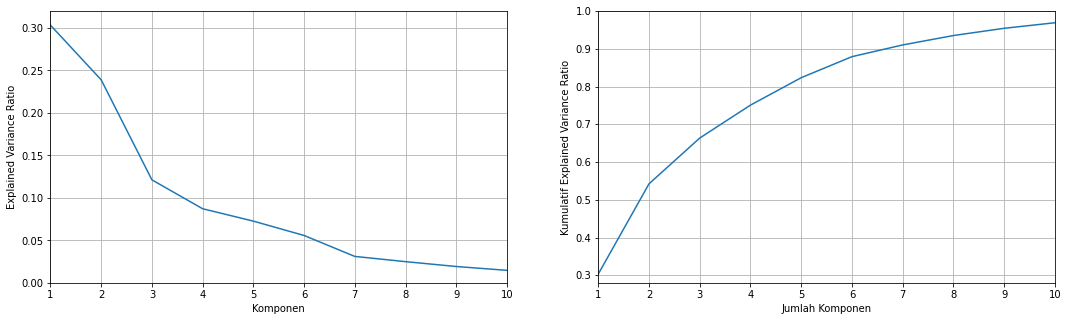

In [32]:
# visualisasi PCA dengan menggunakan elbow method
fig,ax=plt.subplots(ncols=2,figsize=(18,5))
ax[0].plot(range(1,11),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].axis([1,10,0.00,0.32])
ax[0].set_ylabel('Explained Variance Ratio')
ax[0].grid()

ax[1].plot(range(1,11),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].axis([1,10,0.28,1.0])
ax[1].set_ylabel('Kumulatif Explained Variance Ratio')
ax[1].grid()
plt.show()

Teradapat dua grafik diatas yang saling berkaitan satu sama lain. Grafik sebelah kiri adalah nilai EVR pada masing-masing jumlah komponen, lalu grafik sebelah kanan adalah hasil kumulatif EVR jika kita memilih mengambil dengan jumlah n komponen. Dari grafik sebelah kiri, kita dapat melihat bahwa terjadi pelandaian pada saat komponen telah melewati angka 7. Artinya pemilihan komponen lebih dari 7 sudah tidak akan memmpengaruhi pengambilan informasi dari dataset secara signifikan. Pada grafik sebelah kanan, jumlah komponen = 7 telah melewati batas 90% informasi data yang terambil, dan setelah melewati jumlah komponen = 7, grafiknya pun sudah cukup melandai. Maka dalam penentuan berapa komponen atau dimensi yang akan dipilih untuk pemodelan, jumlah komponen sama dengan 7 akan kita gunakan berdasarkan evaluasi dari elbow method ini.

In [33]:
# finalisasi pca dengan jumlah komponen terbaik
pca_final = PCA(n_components=7)
X_final = pca_final.fit_transform(X_scaled)

In [34]:
# hasil kumulatif EVR
np.sum(pca_final.explained_variance_ratio_)

0.9100904319440448

PCA dengan jumlah komponen 7 dapat mengambil 91% dari keseluruhan informasi data yang ada.

In [35]:
# dimensi data untuk pemodelan
X_final.shape

(4414, 7)

Fitur yang akan digunakan dalam pemodelan adalah 7 komponen PCA yang sudah kita pilih sebelumnya.

__________________

# VI. Model Definition

Model Machine Learning Clustering yang akan saya gunakan dalam pemodelan disini adalah model K-Means, Agglomerative Clustering, dan Spectral Clustering. Ketiga model ini memiliki kelebihan dan kelemahannya masing-masing sehingga layak dicoba dalam melakukan clustering menggunakan dataset ini. Metriks untuk mengevaluasi model clustering ini ada dua yaitu elbow method dan silhouette score, namun pada model Agglomerative Clustering dan Spectral CLustering, hanya akan menggunakan metriks silhouette score saja.

In [36]:
# model clustering
kmeans = KMeans(n_clusters=5, random_state=100)
agg_clust = AC(linkage='ward')
scl = SC(n_clusters = 2, gamma= 0.01)

__________________

# VII. Model Training and Evaluation

Pada bagian model training dan evaluasi ini, saya akan membaginya menjadi masing-masing model.

## A. K-Means

Model K-Means akan melakukan training model dengan jumlah cluster berkisar dari 2 sampai 10, lalu selanjutnya kita akan melakukan evaluasi dengan menggunakan metriks elbow method dan silhouette score untuk menentukan jumlah cluster terbaik.

### Elbow Method - KMeans

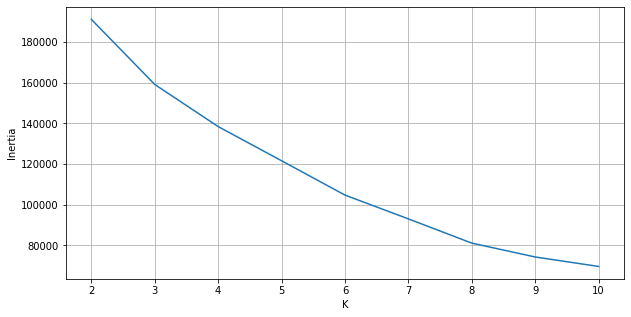

In [37]:
# training model K-Means
K=[2,3,4,5,6,7,8,9,10]
inertia=[KMeans(n_clusters=i).fit(X_final).inertia_ for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Jika kita menggunakan elbow method, kita kesulitan dalam melihat patahan yang menentukan jumlah cluster terbaik. Pendapat pribadi saya mengatakan bahwa cluster = 8 merupakan cluster terbaik karena pada cluster setelah 8, hasilnya melandai, namun persepsi orang lain mungkin saja mengatakan hal yang berbeda. Sehingga kita dapat melakukan evaluasi moodel KMeans ini menggunakan metriks lain yaitu silhouette score.

### Silhouette Score - KMeans

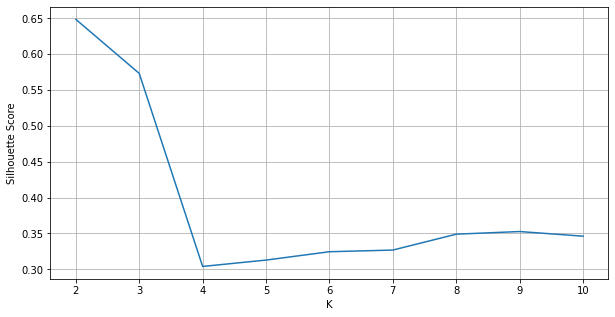

In [38]:
# training model KMeans
K=[2,3,4,5,6,7,8,9,10]
s_score=[silhouette_score(X_final, KMeans(n_clusters=i).fit(X_final).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Hasil silhouette score ditas menunjukan bahwa cluster berjumlah 2 sangat baik dalam melakukan clustering, lalu disusul dengan cluster berjumlah 3. Jumlah cluster lebih dari 3 memperlihatkan hasil silhouette score yang buruk, banyak cluster yang bercampur antar cluster lainnya. Untuk melihat visualisasi dan hasil dari silhouette score ini, saya akan menggunakan fungsi yang dapat melakukan visualisasi untuk melihat jumlah cluster yang terbaik dalam melakukan clustering.

In [39]:
# fungsi visualisasi model KMeans dengan menggunakan silhouette score

def plot_silhouette_kmeans(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.6485494492599294
For n_clusters = 3 The average silhouette_score is : 0.5731789282878393
For n_clusters = 4 The average silhouette_score is : 0.30263274198690465
For n_clusters = 5 The average silhouette_score is : 0.3115284875055088
For n_clusters = 6 The average silhouette_score is : 0.3245428004254554
For n_clusters = 7 The average silhouette_score is : 0.32603923540812696
For n_clusters = 8 The average silhouette_score is : 0.34947016033494094
For n_clusters = 9 The average silhouette_score is : 0.35020926348576464
For n_clusters = 10 The average silhouette_score is : 0.3475748904105089


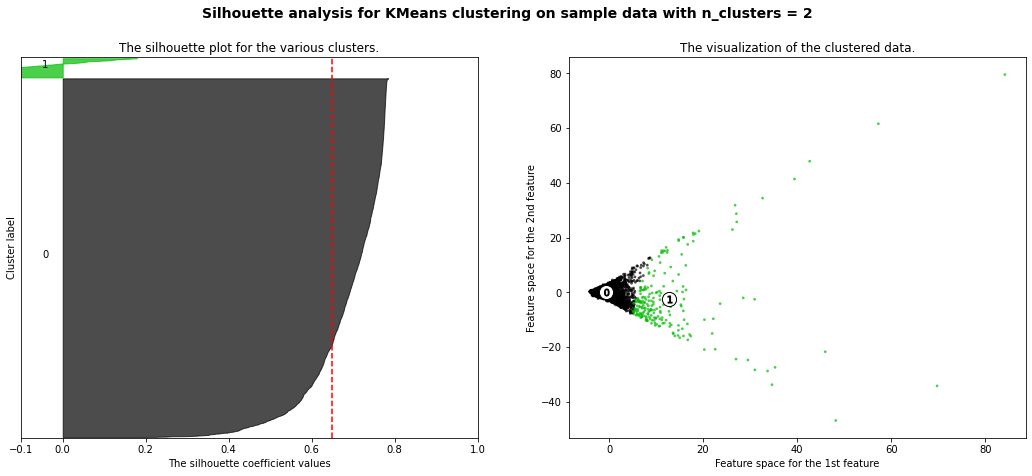

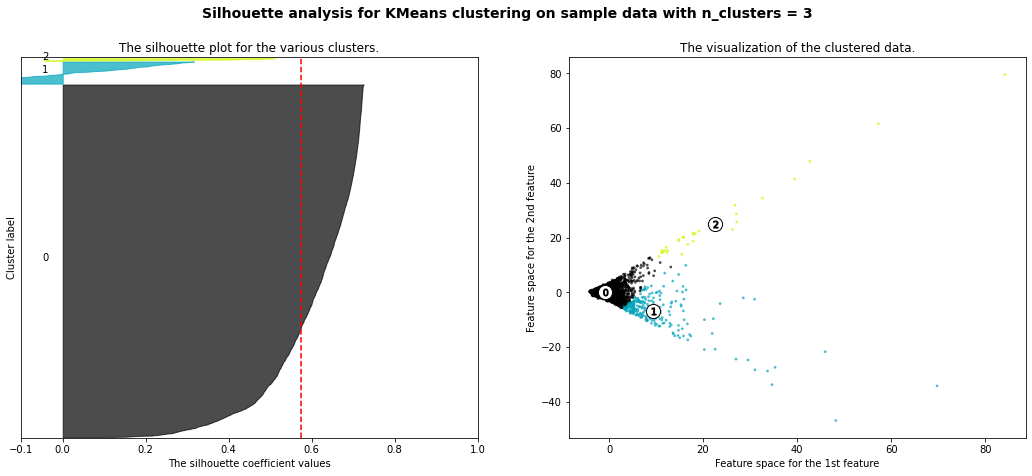

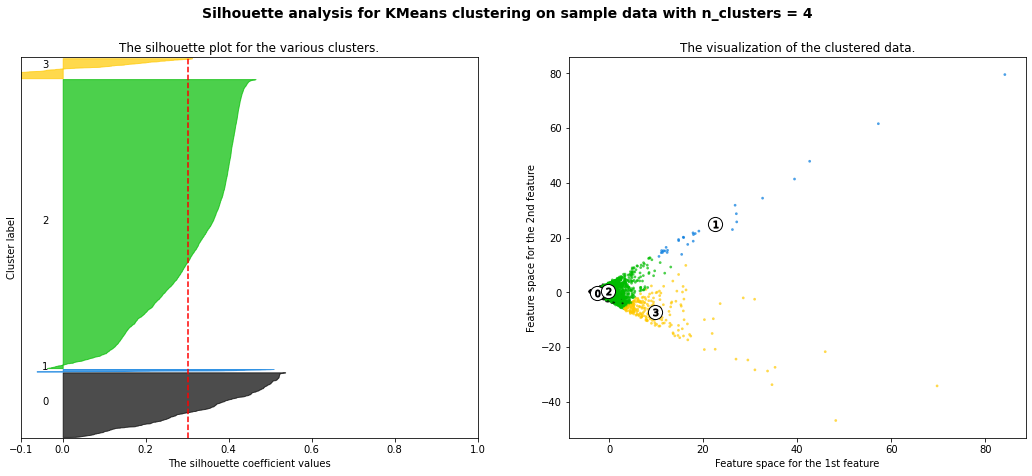

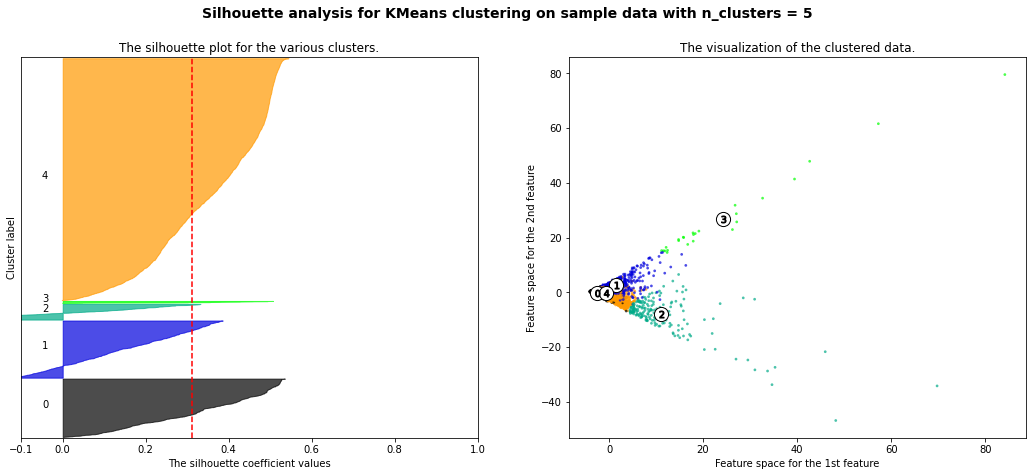

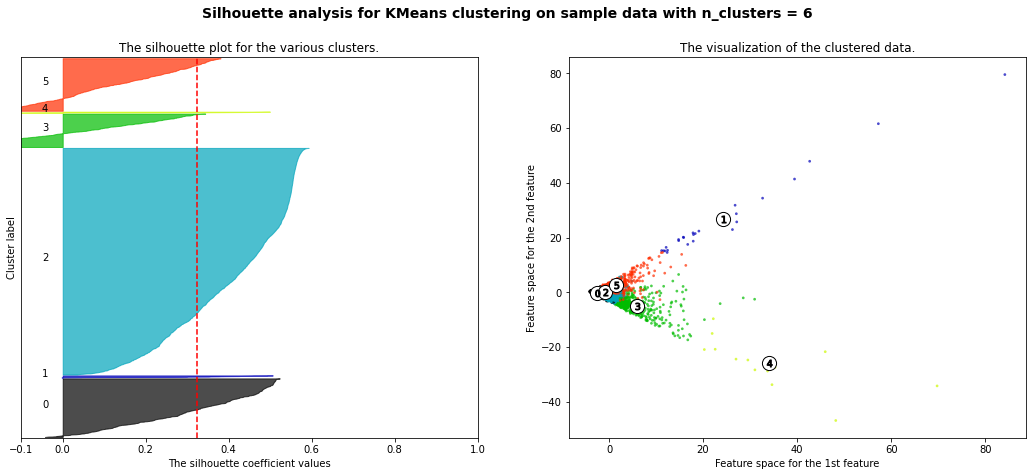

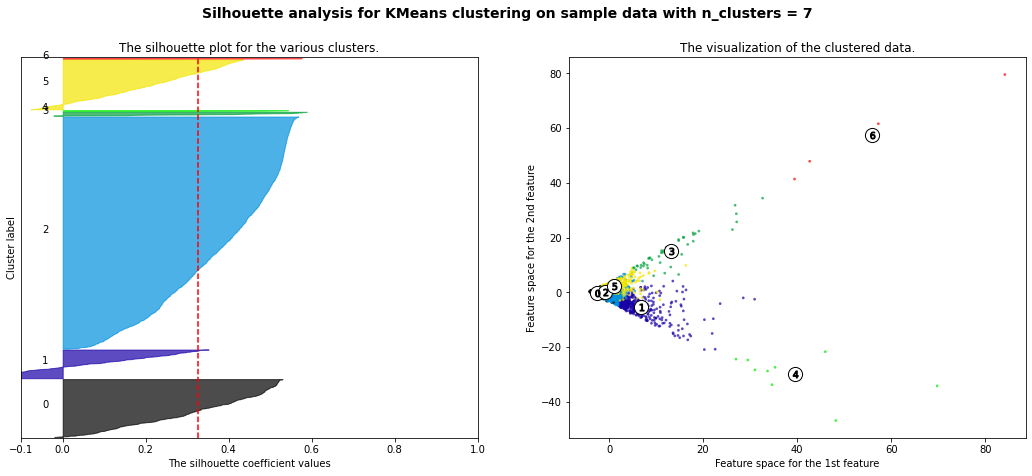

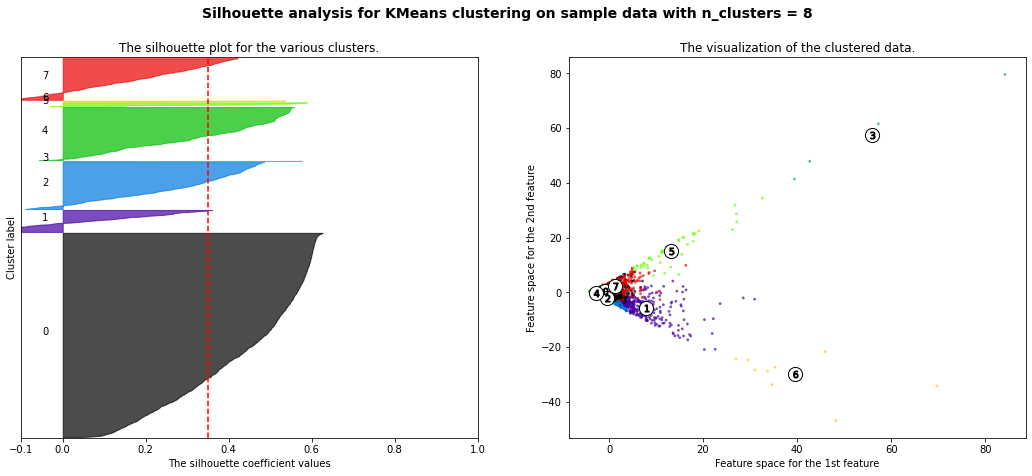

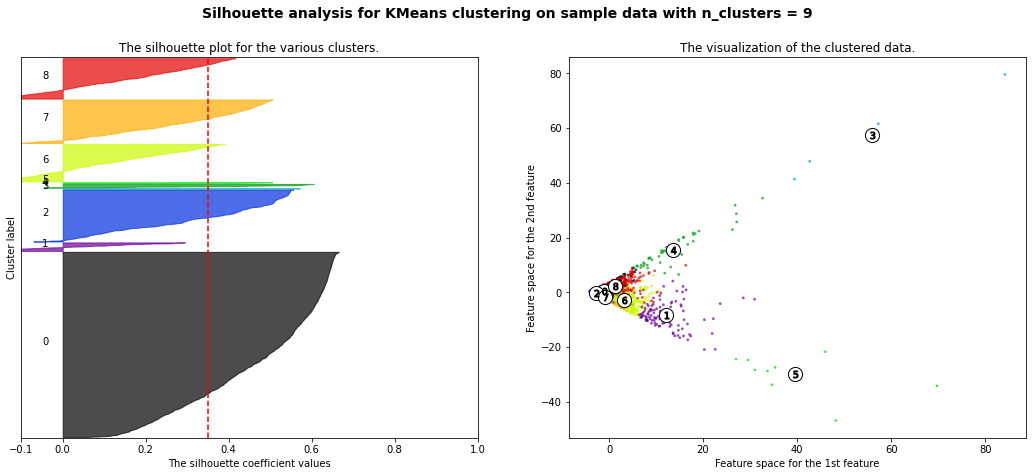

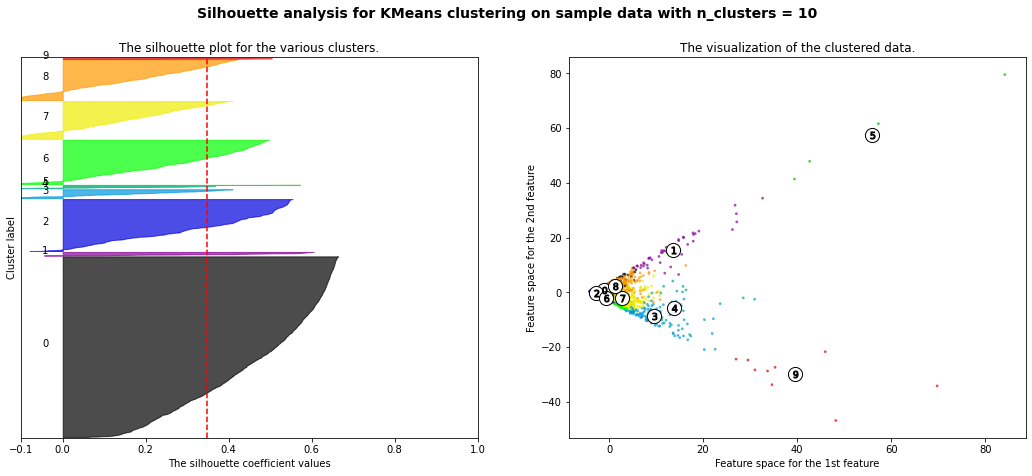

In [40]:
# menggunakan fungsi untuk visualisasi model KMeans
plot_silhouette_kmeans(K, X_final)

Hasil visualisasi diatas menunjukan bahwa jumlah cluster sama dengan 3 terlihat cukup baik dalam melakukan clustering. Hal ini dapat dikatakan sebagai pendapat pribadi saya, namun jika dilihat pada plot 2 dimensinya, cluster berjumlah 3 terlihat cukup baik dalam melalukan clustering. Maka pada model clustering KMeans ini, jumlah cluster yang akan dipilih adalah jumlah cluster 3.

In [41]:
# model KMeans dengan jumlah cluster terbaik
kmeans_best = KMeans(n_clusters=3, random_state=100)

# fit model KMeans pada data
kmeans_best.fit(X_final)

KMeans(n_clusters=3, random_state=100)

In [42]:
# label / hasil clustering dari model KMeans
kmeans_best.labels_

array([2, 2, 2, ..., 2, 2, 2])

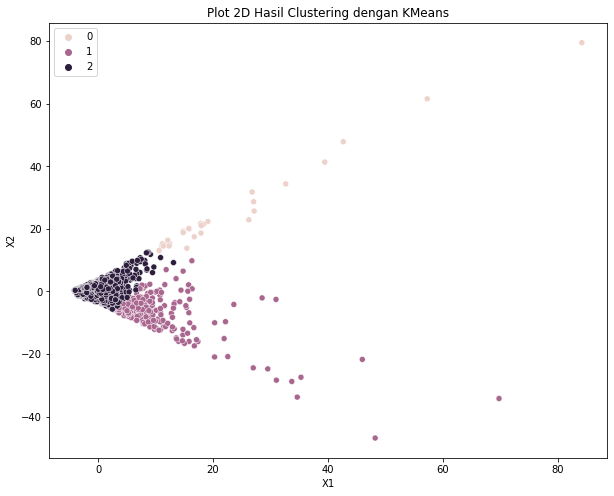

In [43]:
# visualisasi hasil clustering pada plot 2 dimensi
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_final[:,0],y=X_final[:,1],hue=kmeans_best.labels_)
plt.title('Plot 2D Hasil Clustering dengan KMeans')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Grafik diatas adalah hasil plot 2 dimensi dengan menggunakan model clustering KMeans dengan cluster berjumlah 3.

In [44]:
# Rata-rata hasil silhouette score model KMeans
silhouette_avg_kmeans = silhouette_score(X_final, kmeans_best.labels_)
print("Rata-rata nilai silhouette score model KMeans :", silhouette_avg_kmeans)

Rata-rata nilai silhouette score model KMeans : 0.5731789282878393


## B. Agglomerative Clustering

Model Agglomerative Clustering akan melakukan training model dengan jumlah cluster berkisar dari 2 sampai 10, lalu selanjutnya kita akan melakukan evaluasi dengan menggunakan metriks silhouette score untuk menentukan jumlah cluster terbaik.

### Silhouette Score - Agglomerative Clustering

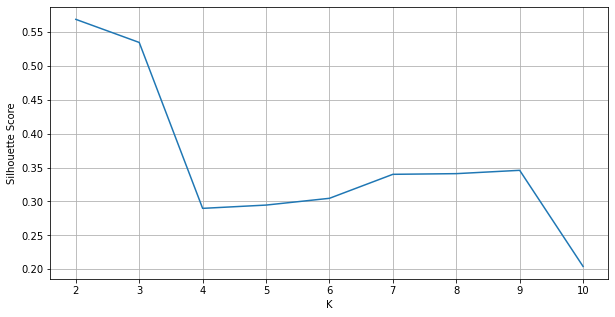

In [45]:
# training model Agglomerative Clustering
K=[2,3,4,5,6,7,8,9,10]
s_score_ac=[silhouette_score(X_final, AC(n_clusters=i).fit(X_final).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score_ac)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Hasil silhouette score ditas menunjukan bahwa cluster berjumlah 2 sangat baik dalam melakukan clustering, lalu disusul dengan cluster berjumlah 3. Jumlah cluster lebih dari 3 memperlihatkan hasil silhouette score yang buruk, banyak cluster yang bercampur antar cluster lainnya. Untuk melihat visualisasi dan hasil dari silhouette score pada Agglomerative CLustering ini, saya akan menggunakan fungsi yang dapat melakukan visualisasi untuk melihat jumlah cluster yang terbaik dalam melakukan clustering.

In [46]:
# fungsi visualisasi model Agglomerative Clustering dengan menggunakan silhouette score

def plot_silhouette_agg(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = AC(n_clusters=n_clusters, linkage='ward')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.5689916697248008
For n_clusters = 3 The average silhouette_score is : 0.5348762987174314
For n_clusters = 4 The average silhouette_score is : 0.2898579342682716
For n_clusters = 5 The average silhouette_score is : 0.29470364751572653
For n_clusters = 6 The average silhouette_score is : 0.30469787267175463
For n_clusters = 7 The average silhouette_score is : 0.34013165117127303
For n_clusters = 8 The average silhouette_score is : 0.3411229980968071
For n_clusters = 9 The average silhouette_score is : 0.3460427961482922
For n_clusters = 10 The average silhouette_score is : 0.20407798124562107


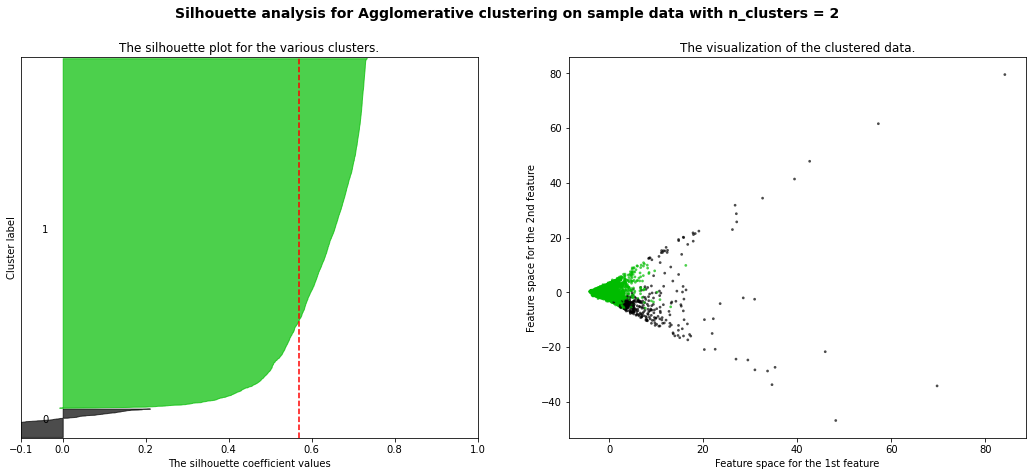

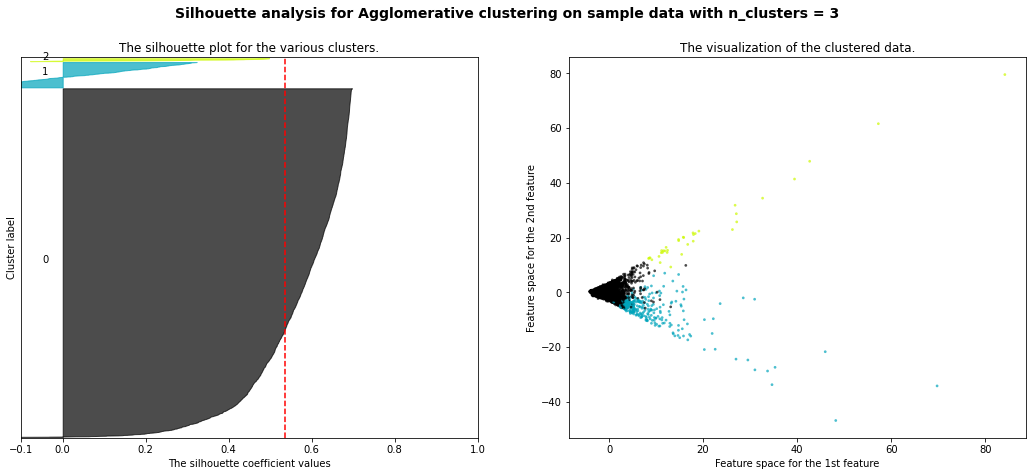

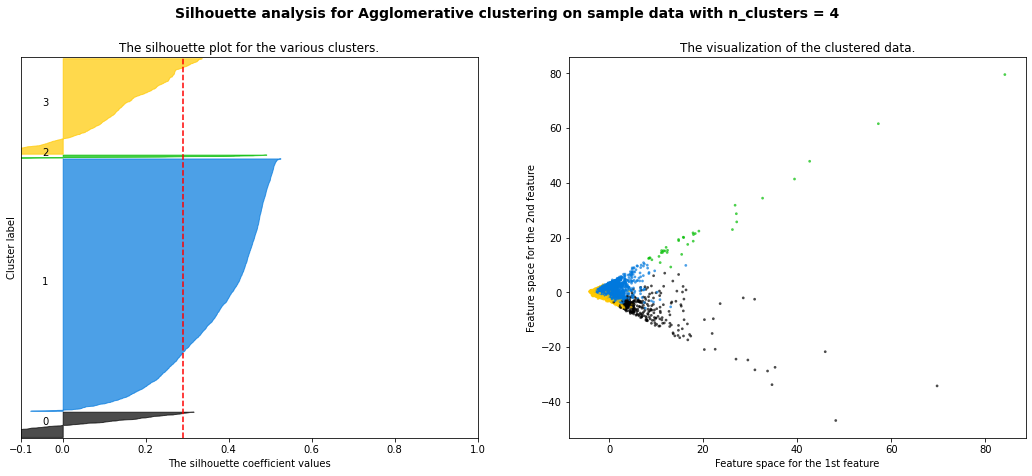

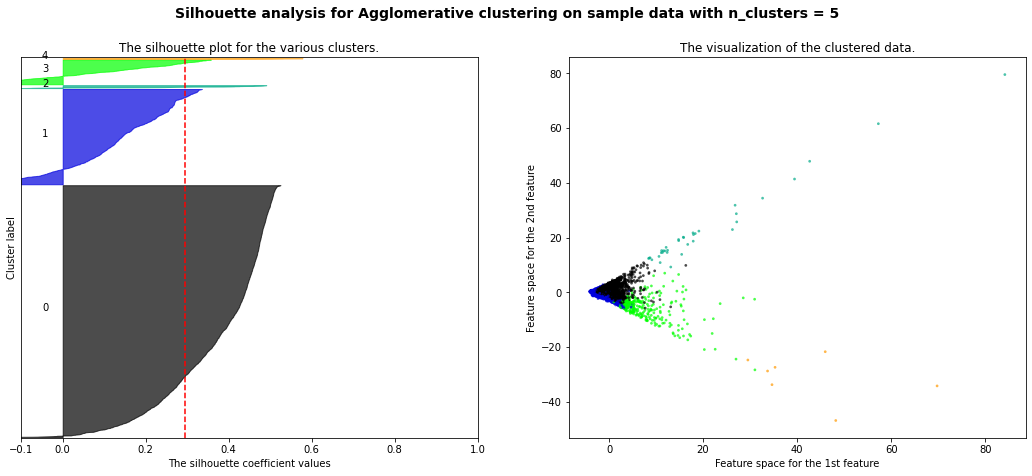

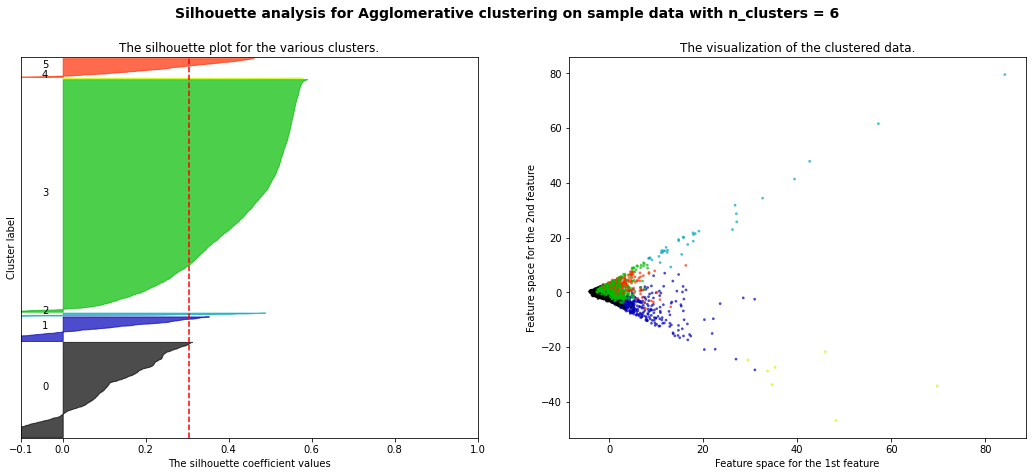

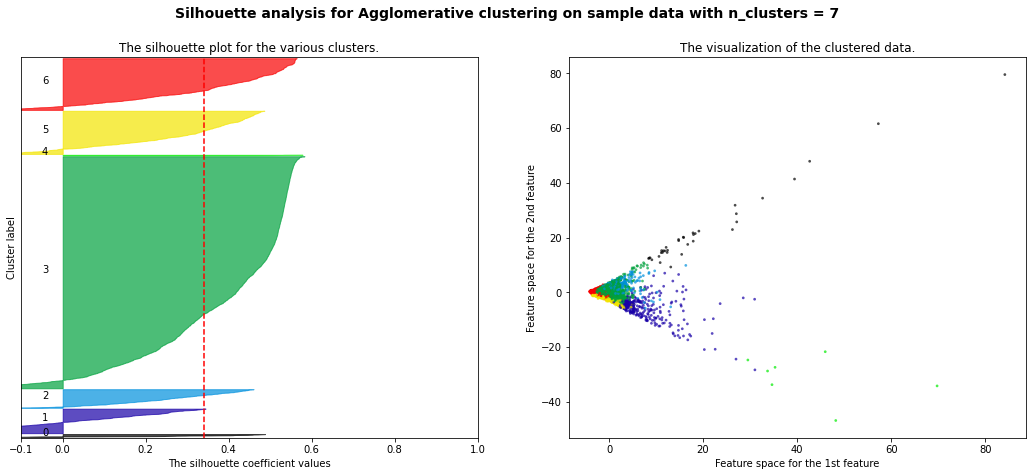

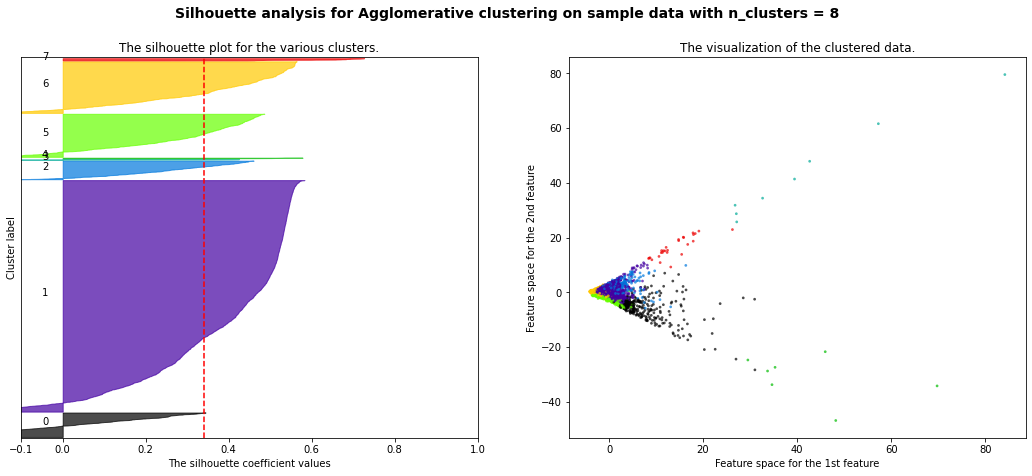

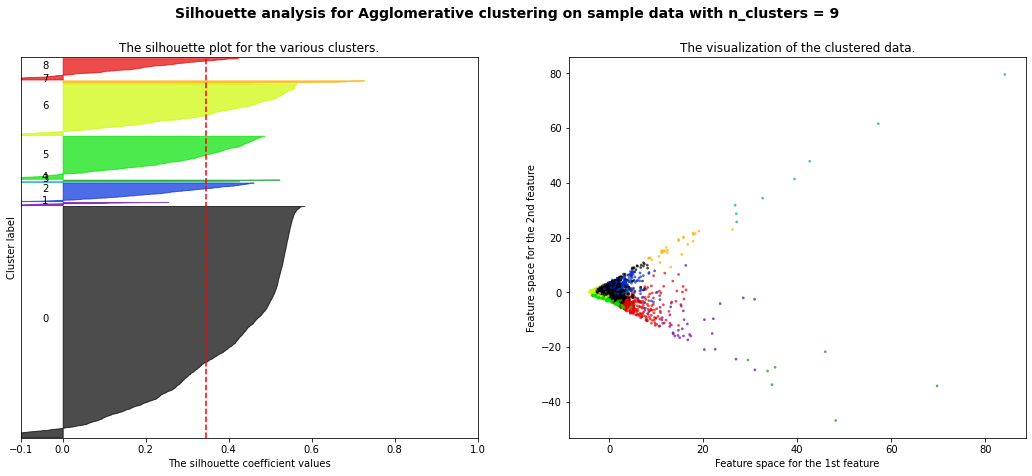

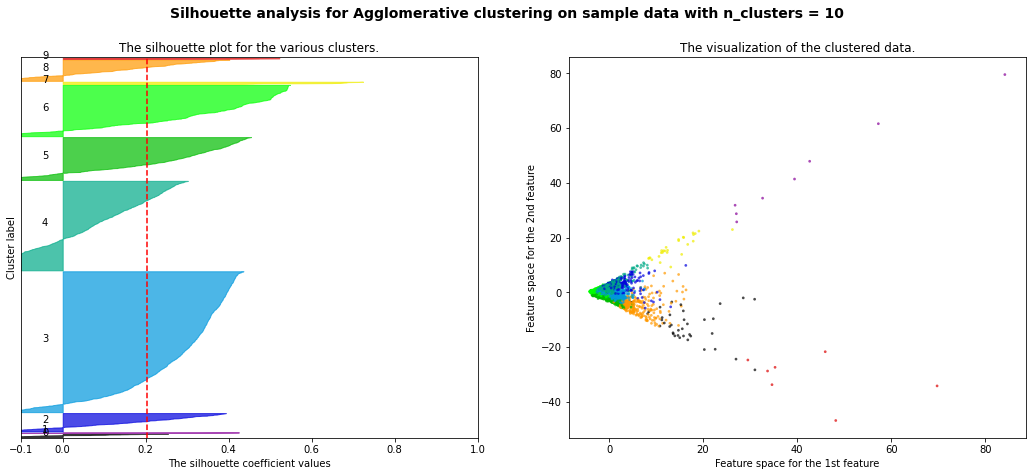

In [47]:
# menggunakan fungsi untuk visualisasi model Agglomerative Clustering
plot_silhouette_agg(K, X_final)

Hasil visualisasi Agglomerative Clustering diatas menunjukan bahwa jumlah cluster sama dengan 3 terlihat cukup baik dalam melakukan clustering. Hasil ini terlihat sama seperti pada model KMeans. Maka pada model Agglomerative clustering ini, jumlah cluster yang akan dipilih adalah jumlah cluster 3.

In [48]:
# model Agglomerative dengan jumlah cluster terbaik
agg_clust_final = AC(n_clusters=3, linkage='ward')

In [49]:
# model Agglomerative Clustering fit pada data
agg_clust_final.fit(X_final)

AgglomerativeClustering(n_clusters=3)

In [50]:
# label / hasil clustering dari model Agglomerative Clustering
agg_clust_final.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

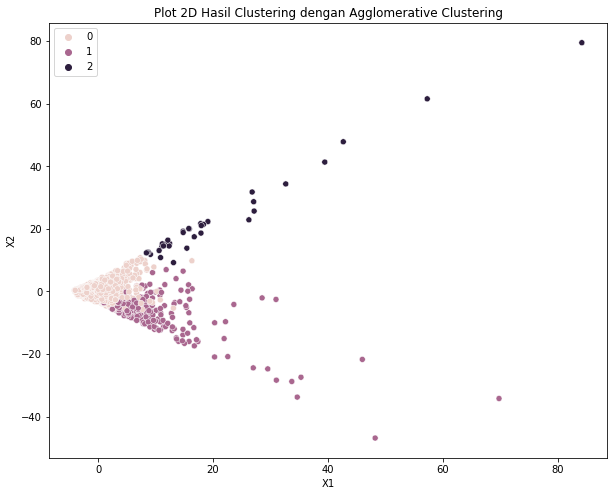

In [51]:
# visualisasi hasil Agglomerative clustering pada plot 2 dimensi
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_final[:,0],y=X_final[:,1],hue=agg_clust_final.labels_)
plt.title('Plot 2D Hasil Clustering dengan Agglomerative Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Grafik diatas adalah hasil plot 2 dimensi dengan menggunakan model Agglomerative Clustering dengan cluster berjumlah 3.

In [52]:
silhouette_avg_agg = silhouette_score(X_final, agg_clust_final.labels_)
print("Rata-rata nilai silhouette score model KMeans :", silhouette_avg_agg)

Rata-rata nilai silhouette score model KMeans : 0.5348762987174314


## C. Spectral Clustering

Model Spectral Clustering akan melakukan training model dengan jumlah cluster berkisar dari 2 sampai 10, lalu selanjutnya kita akan melakukan evaluasi dengan menggunakan metriks silhouette score untuk menentukan jumlah cluster terbaik.

### Silhouette Score - Spectral Clustering

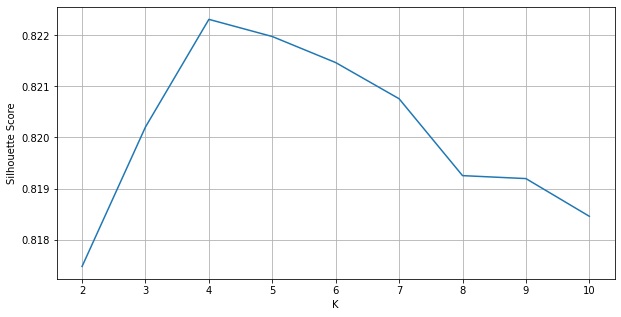

In [53]:
# training moddel Spectral Clustering
K=[2,3,4,5,6,7,8,9,10]
s_score_slc=[silhouette_score(X_final, SC(n_clusters=i, gamma = 0.01).fit(X_final).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score_slc)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Hasil silhouette score ditas menunjukan bahwa cluster berjumlah 4 sangat baik dalam melakukan clustering, lalu disusul dengan cluster berjumlah 5. Hasil silhouette score pada Spectral ini terlihat cukup baik karena scorenya mendekati angka 1 yang artinya model dapat melalukan clustering pada setiap kelasnya dengan baik, namun apakah benar hasil clustering tersebut lebih baik daripada 2 model sebelumnya? Untuk menjawab pertanyaan ini kita perlu melakukan visualisasi untuk melihat persebaran setiap clusternuya pada plot 2 dimensi.

In [54]:
# fungsi visualisasi model Spectral Clustering dengan menggunakan silhouette score

def plot_silhouette_slc(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = SC(n_clusters=n_clusters, gamma=0.01)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for Spectral clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.8174730077058071
For n_clusters = 3 The average silhouette_score is : 0.820205813887598
For n_clusters = 4 The average silhouette_score is : 0.8223151613286077
For n_clusters = 5 The average silhouette_score is : 0.8219787500049752
For n_clusters = 6 The average silhouette_score is : 0.8214680782423089
For n_clusters = 7 The average silhouette_score is : 0.8207591849234083
For n_clusters = 8 The average silhouette_score is : 0.8192527325820346
For n_clusters = 9 The average silhouette_score is : 0.8191946692399483
For n_clusters = 10 The average silhouette_score is : 0.818455731397184


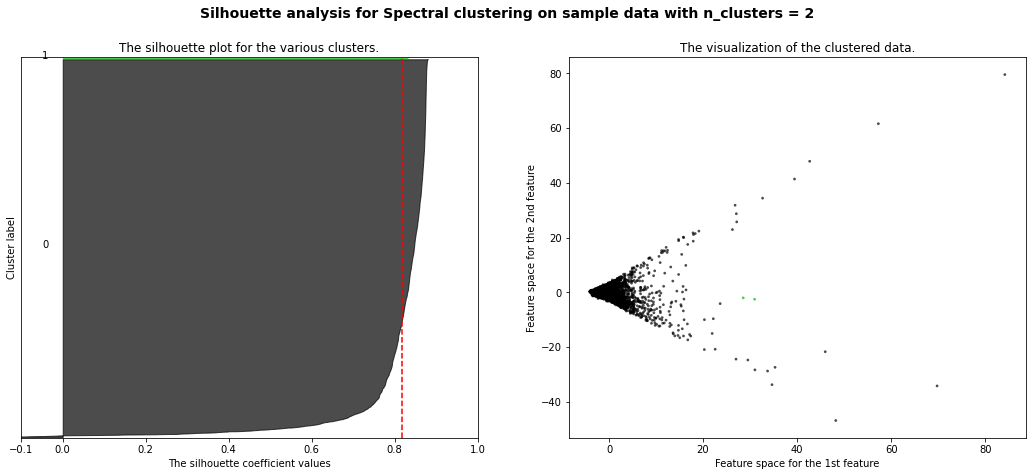

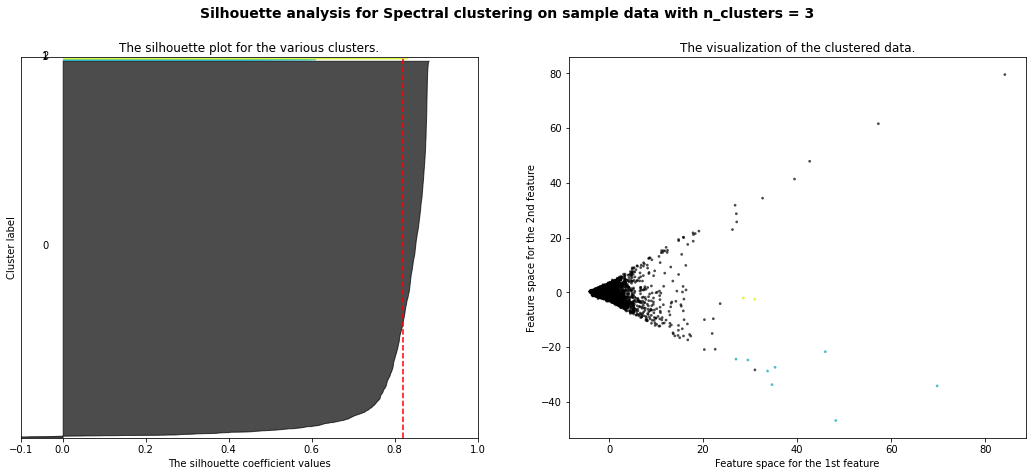

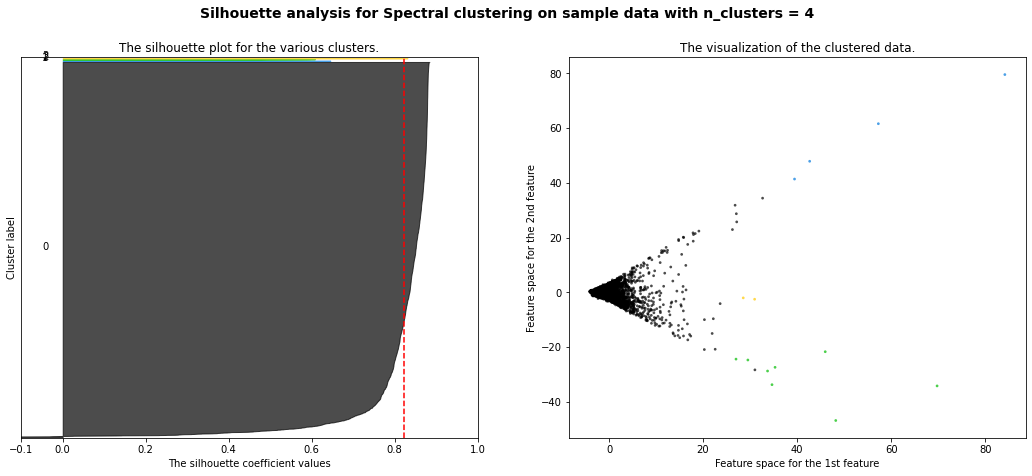

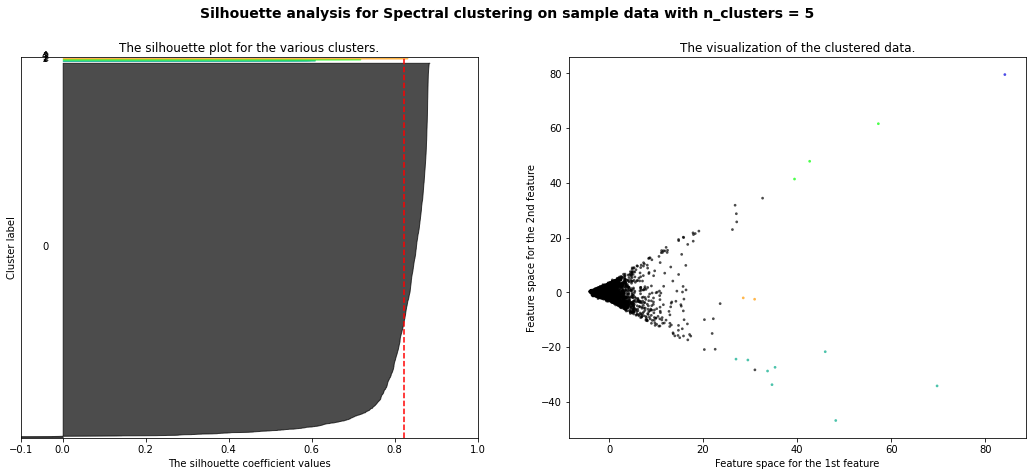

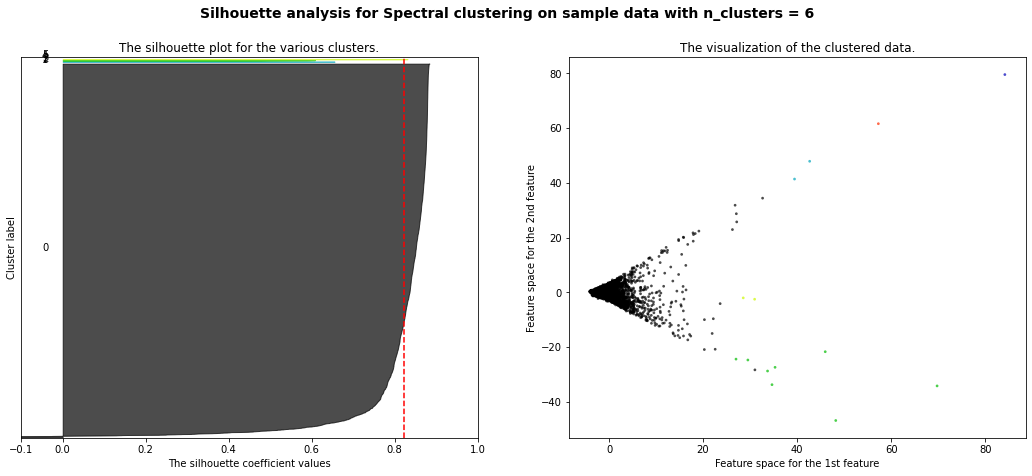

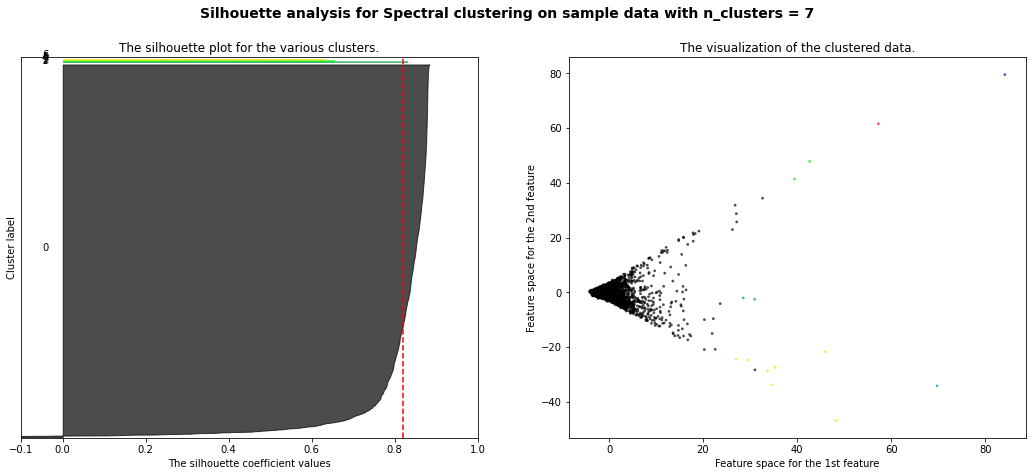

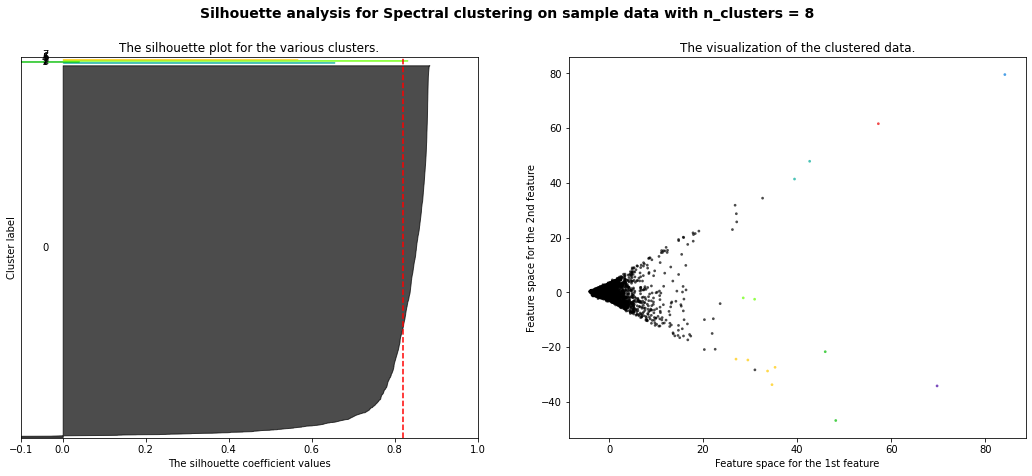

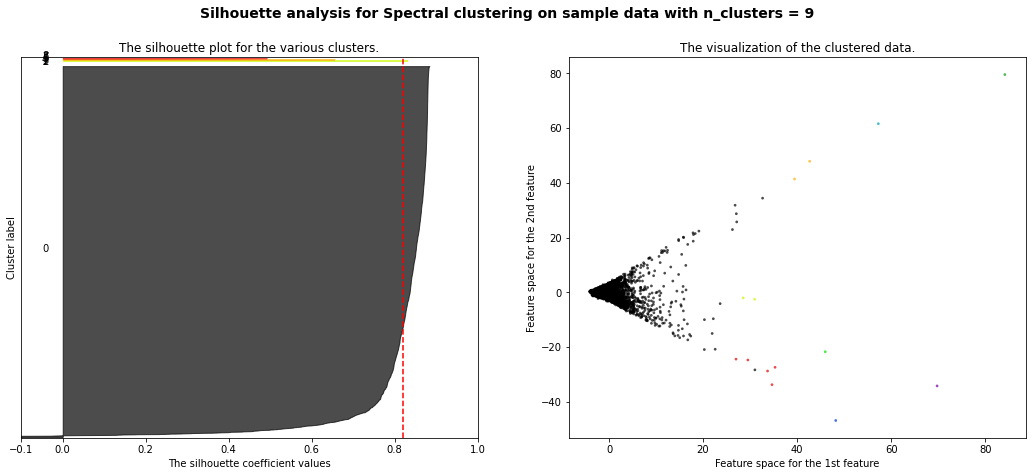

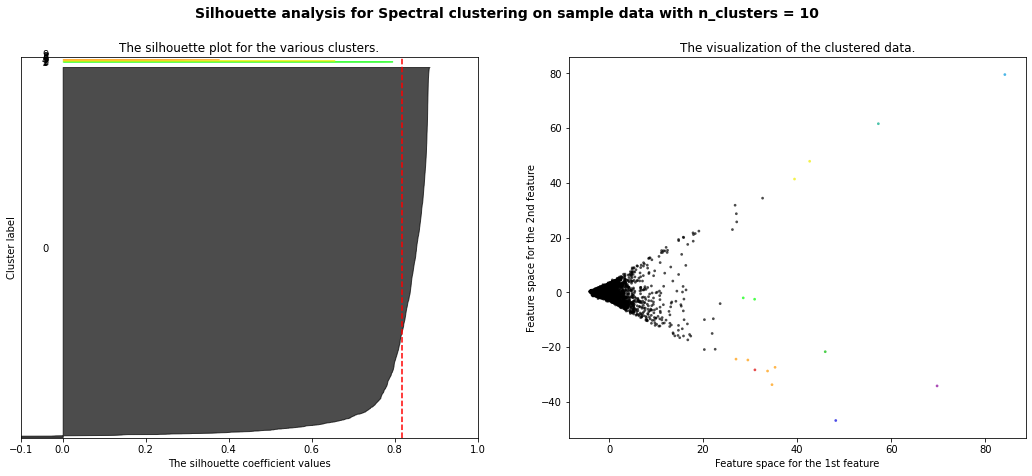

In [55]:
# fungsi visualisasi model Spectral Clustering
plot_silhouette_slc(K, X_final)

Hasil visualisasi Spectral Clustering diatas menunjukan bahwa model clustering ini tidak cukup baik dalam melakukan clustering pada dataset ini. Terdapat 1 kelas yang sangat mendominasi jumlahnya, walaupun hasil dari silhouette scorenya cukup baik. Berdasarkan hasil visualisasi ini, dapat kita simpulkan bahwa model Spectral Clustering kurang cocok dalam melakukan clustering menggunakan dataset nasabah bank. Sehingga model ini tidak akan kita bahas lebih lanjut.

### Kesimpulan Model Training and Evaluation

Dari proses modeling dan evaluation ketiga model yang kita gunakan, model KMeans dan Agglomerative Clustering dapat melakukan clustering menjadi 3 cluster nasabah dengan cukup baik. Cluster berjumlah 3 dirasa sudah cukup baik dalam melakukan segmentasi nasabah bank.

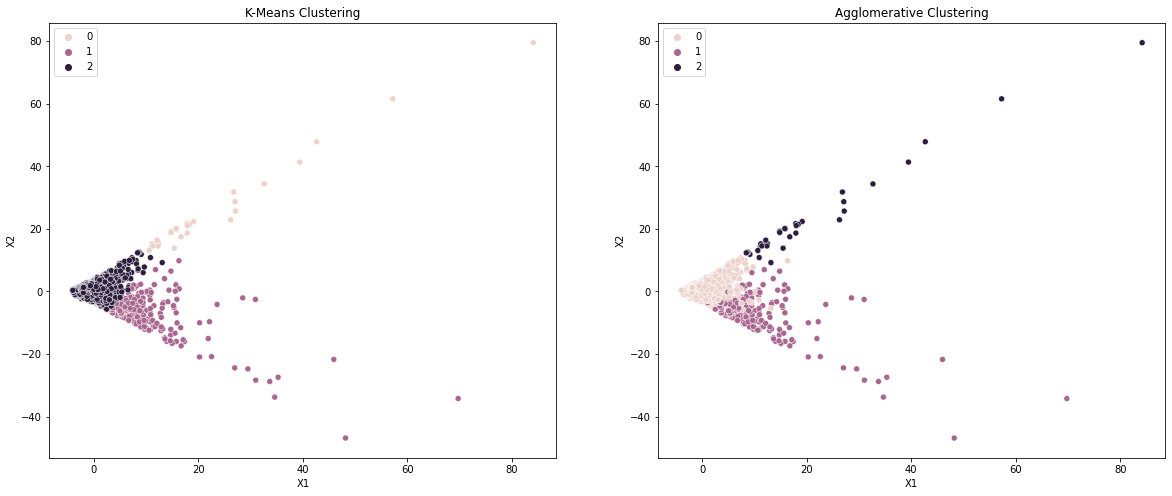

In [56]:
# visualisasi model KMeans dan Agglomerative Clustering
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
sns.scatterplot(x=X_final[:,0],y=X_final[:,1],hue=kmeans_best.labels_, ax=ax[0])
ax[0].set_title('K-Means Clustering')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')

sns.scatterplot(x=X_final[:,0],y=X_final[:,1],hue=agg_clust_final.labels_, ax=ax[1])
ax[1].set_title('Agglomerative Clustering')
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')
plt.show()

Jika kita sandingkan hasil kedua model clustering, terlihat tidak ada perbedaan yang signifikan dianatara keduanya, walau mungkin terdapat beberapa nasabah yang memiliki cluster berbeda pada masing-masing model. Untuk model EDA dan model inference, saya akan memilih untuk menggunakan hasil clustering pada model KMeans.

___________________________

# VIII. Model EDA

Hasil dari clustering menggunakan model KMeans lalu kita tambahkan kedalam data kita untuk dapat kita eksplorasi lebih lanjut.

In [57]:
# merubah hasil clustering menjadi dataframe
clust_kmeans = pd.DataFrame(kmeans_best.labels_, columns=['cluster'])
clust_kmeans

,cluster
0,2
1,2
2,2
3,2
4,2
...,...
4409,2
4410,2
4411,2
4412,2


In [58]:
# menambah hasil clustering ke data awal
data_cluster = pd.concat([X_id, X, clust_kmeans], axis=1)
data_cluster.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,0.000000,0.000000,8,2
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,0.000000,0.000000,8,2
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8,2
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8,2
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8,2
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8,2
6,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8,2
7,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12,2
8,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12,2
9,131,63.078242,1.000000,114.00,0.00,114.00,0.0,0.250,0.000,0.25,0.0,0,3,3000.0,184.582486,136.782541,0.000000,12,2


Kita telah berhasil menambahkan hasil clustering pada dataset ini, selanjutnya kita akan melakukan EDA mengenai cluster-cluster yang terbentuk.

In [59]:
# proporsi cluster
data_cluster['cluster'].value_counts()

2    4126
1     259
0      29
Name: cluster, dtype: int64

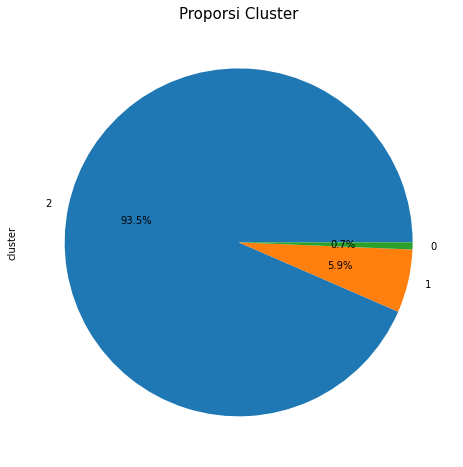

In [60]:
# pie chart hasil clustering
data_cluster['cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Proporsi Cluster', size = 15)
plt.show()

Proporsi hasil clustering yang terbentuk adalah cluster mayoritas ternyata ada pada cluster 2 dengan jumlah proporsi mencapai 93,5% lalu cluster 1 sebanyak 5,9% dan cluster 0 sebanyak 0,7%. Hasil clustering ini menunjukan imbalance class sehingga cluster mayoritas menyimpan informasi yang paling banyak daripada cluster lain. Model improvement selanjutnya diharapkan dapat menurunkan proporsi cluster 2 ini dan memberikan hasil proporsi yang seimbang antar cluster.

In [61]:
# rata-rata kolom berdasarkan cluster
data_cluster.groupby('cluster').mean().T

cluster,0,1,2
CUST_ID,5047.827586,4472.544402,4474.522055
BALANCE,3964.016803,3229.014935,1457.604683
BALANCE_FREQUENCY,0.978056,0.980512,0.876758
PURCHASES,922.145172,6945.525792,634.380790
ONEOFF_PURCHASES,75.223103,4763.284826,340.972598
INSTALLMENTS_PURCHASES,846.922069,2184.557568,293.510887
CASH_ADVANCE,1600.695074,1263.730670,971.045671
PURCHASES_FREQUENCY,0.511755,0.926048,0.462560
ONEOFF_PURCHASES_FREQUENCY,0.029781,0.701913,0.173579
PURCHASES_INSTALLMENTS_FREQUENCY,0.485110,0.712872,0.339689


Dari EDA cluster ini dapat kita ambil beberapa poin penting yaitu:
- Cluster 0 memiliki rata-rata saldo yang paling tinggi, lalu diikuti oleh cluster 1 dan cluster 2. (`BALANCE`)
- Rata-rata credit limit pada cluster 1 jumlahnya paling tinggi diantara 2 cluster lain. (`CREDIT_LIMIT`)
- Rata-rata besaran pembayaran yang dilakukan nasabah pada cluster 1 lebih tinggi daripada cluster lain. (`PAYMENTS`)
- Rata-rata total transaksi pembelian pada cluster 1 lebih tinggi daripada cluster lain (`PURCHASES_TRX`)

### Visualisasi Model EDA

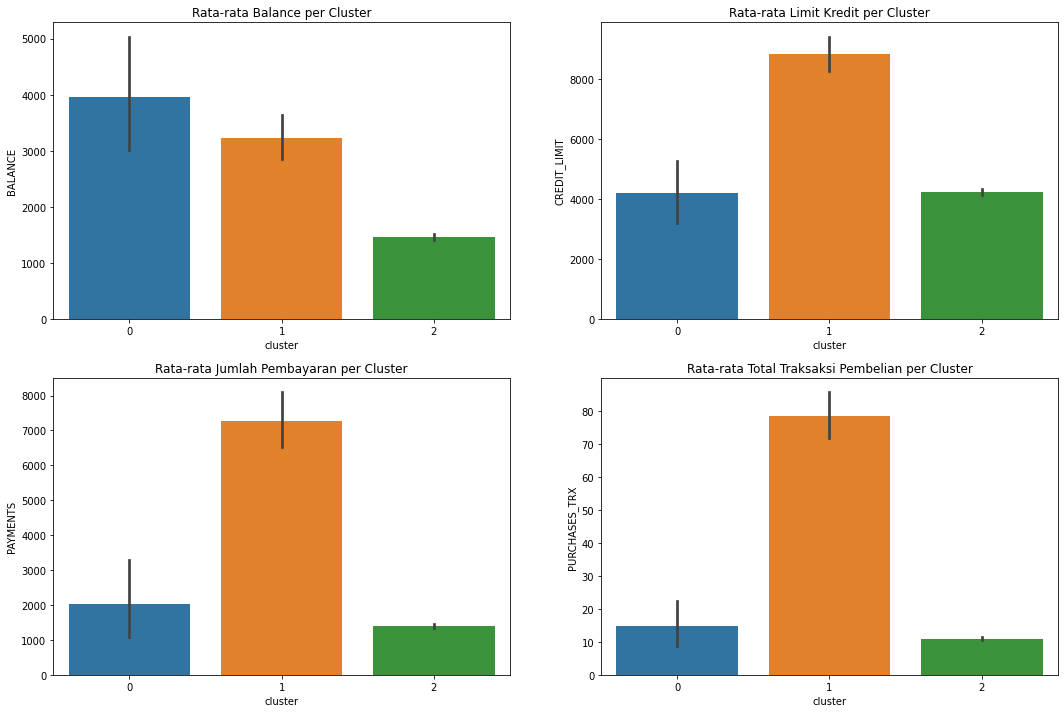

In [62]:
# visualisai model EDA
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize=(18,12))

sns.barplot(data = data_cluster, x = 'cluster', y = 'BALANCE', ax=ax[0][0])
ax[0][0].set_title('Rata-rata Balance per Cluster')

sns.barplot(data = data_cluster, x = 'cluster', y = 'CREDIT_LIMIT', ax=ax[0][1])
ax[0][1].set_title('Rata-rata Limit Kredit per Cluster')

sns.barplot(data = data_cluster, x = 'cluster', y = 'PAYMENTS', ax=ax[1][0])
ax[1][0].set_title('Rata-rata Jumlah Pembayaran per Cluster')

sns.barplot(data = data_cluster, x = 'cluster', y = 'PURCHASES_TRX', ax=ax[1][1])
ax[1][1].set_title('Rata-rata Total Traksaksi Pembelian per Cluster')

plt.show()

Kesimpulan dari model EDA ini adalah cluster 1 merupakan nasabah bank yang paling aktif dalam menggunakan produk perbankan. Nasabah cluster 1 ini sangat berpotensi untuk melanjutkan menggunakan produk-produk yang akan bank tawarkan di masa yang akan datang. Cluster 0 merupaka cluster yang kurang aktif dalam menggunakan produk dan jasa bank ini namun memiliki potensi di masa yang akan datang karena rata-rata jumlah saldonya adalah yang tertinggi diantara cluster lain. Cluster 2 merupakan cluster yang paling pasif diantara cluster lain. Nasabah pada cluster 2 ini sangat jarang bertransaksi menggunakan kartu kreditnya. Promo-promo yang dapat meningkatkan keaktifan nasabah sangat cocok difokuskan pada cluster 2 ini untuk mendorong kemauan nasabah cluster 2 dalam menggunakan produk yang bank tawarkan.

________________________

# IX. Model Inference

Setelah kita berhasil membuat model clustering, berikutnya adalah mencoba melakukan generalisasi menggunakan model tersebut kepada data inference yang sudah kita pisahkan sebelumnya.

In [63]:
# preview data inference
df_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3213,361.319366,1.000000,3095.96,1383.56,1712.40,0.000000,1.000000,0.916667,0.833333,0.000000,0,32,14000.0,4003.782858,197.186568,0.583333,12
1,309,173.658581,1.000000,1210.00,0.00,1210.00,0.000000,1.000000,0.000000,0.875000,0.000000,0,8,1000.0,977.652258,113.492537,0.833333,8
2,273,3515.499451,1.000000,2864.32,1215.93,1648.39,2880.208755,1.000000,0.583333,1.000000,0.416667,40,91,5500.0,3362.139057,1988.153764,0.000000,12
3,4405,1851.372165,1.000000,6006.79,5506.81,499.98,0.000000,1.000000,1.000000,0.916667,0.000000,0,93,7600.0,5389.673400,586.243930,0.083333,12
4,3227,2833.613641,1.000000,1387.52,526.12,861.40,1442.587409,1.000000,0.250000,0.750000,0.166667,5,20,3000.0,1564.459934,2019.019279,0.000000,12
5,7027,1887.061349,1.000000,0.00,0.00,0.00,93.437109,0.000000,0.000000,0.000000,0.166667,3,0,2000.0,411.517239,765.751845,0.000000,12
6,4665,748.352082,1.000000,1199.77,464.39,735.38,550.543385,0.916667,0.333333,0.833333,0.333333,7,24,1200.0,622.155263,317.100121,0.090909,12
7,1543,1492.039988,1.000000,4106.15,2688.46,1417.69,734.816479,0.333333,0.250000,0.416667,0.083333,1,50,12000.0,9678.173119,606.899183,0.500000,12
8,7091,8.447806,1.000000,85.12,0.00,85.12,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,7000.0,100.258283,78.383013,0.454545,12
9,8081,705.645246,1.000000,1325.21,1017.21,308.00,0.000000,0.750000,0.583333,0.416667,0.000000,0,14,3000.0,860.265446,227.004657,0.000000,12


Data inference ini akan melalui proses preprocessing yang sama pada saat data awal sebelum digunakan untuk modeling.

### Preprocessing Data Inference

In [64]:
# variabel untuk menyimpan customer id pada data inference
inf_id = df_inf[['CUST_ID']]

In [65]:
# Drop kolom yang tidak dibutuhkan
df_inf = df_inf.drop(['CUST_ID'], axis = 1)

In [66]:
# scaling data inference
df_inf_scaled = scaler.transform(df_inf)

In [67]:
# reduksi dimensi data inference
df_inf_final = pca_final.transform(df_inf_scaled)

In [68]:
# dimensi data untuk model inference
df_inf_final.shape

(20, 7)

### Model Inference menggunakan model KMeans

In [69]:
# fit model KMeans pada data inference
y_inf_pred = kmeans_best.predict(df_inf_final)
y_inf_pred

array([2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
# ubah hasil clustering kedalam dataframe
label_inf = pd.DataFrame(y_inf_pred, columns=['cluster'])

In [71]:
# hasil clustering data inference
data_cluster_inf = pd.concat([inf_id, df_inf, label_inf], axis=1)
data_cluster_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3213,361.319366,1.000000,3095.96,1383.56,1712.40,0.000000,1.000000,0.916667,0.833333,0.000000,0,32,14000.0,4003.782858,197.186568,0.583333,12,2
1,309,173.658581,1.000000,1210.00,0.00,1210.00,0.000000,1.000000,0.000000,0.875000,0.000000,0,8,1000.0,977.652258,113.492537,0.833333,8,2
2,273,3515.499451,1.000000,2864.32,1215.93,1648.39,2880.208755,1.000000,0.583333,1.000000,0.416667,40,91,5500.0,3362.139057,1988.153764,0.000000,12,2
3,4405,1851.372165,1.000000,6006.79,5506.81,499.98,0.000000,1.000000,1.000000,0.916667,0.000000,0,93,7600.0,5389.673400,586.243930,0.083333,12,1
4,3227,2833.613641,1.000000,1387.52,526.12,861.40,1442.587409,1.000000,0.250000,0.750000,0.166667,5,20,3000.0,1564.459934,2019.019279,0.000000,12,2
5,7027,1887.061349,1.000000,0.00,0.00,0.00,93.437109,0.000000,0.000000,0.000000,0.166667,3,0,2000.0,411.517239,765.751845,0.000000,12,2
6,4665,748.352082,1.000000,1199.77,464.39,735.38,550.543385,0.916667,0.333333,0.833333,0.333333,7,24,1200.0,622.155263,317.100121,0.090909,12,2
7,1543,1492.039988,1.000000,4106.15,2688.46,1417.69,734.816479,0.333333,0.250000,0.416667,0.083333,1,50,12000.0,9678.173119,606.899183,0.500000,12,1
8,7091,8.447806,1.000000,85.12,0.00,85.12,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,7000.0,100.258283,78.383013,0.454545,12,2
9,8081,705.645246,1.000000,1325.21,1017.21,308.00,0.000000,0.750000,0.583333,0.416667,0.000000,0,14,3000.0,860.265446,227.004657,0.000000,12,2


In [72]:
# hasil clustering pada setiap customer id
data_cluster_inf[['CUST_ID', 'cluster']]

,CUST_ID,cluster
0,3213,2
1,309,2
2,273,2
3,4405,1
4,3227,2
5,7027,2
6,4665,2
7,1543,1
8,7091,2
9,8081,2


Model inference telah berhasil dilakukan, selanjutnya kita dapat menyerahkan hasil ini kepada tim marketing atau sales untuk menindaklanjuti hasil clustering ini dan menerapkan pendekatan-pendekatan tertentu sesuai dengan karakteristik pada masing-masing cluster.

___________________

# X. Conceptual Problems

Sebelum saya mengambil kesimpulan dari notebook ini, saya akan menjawab beberapa soal mengenai konsep clustering:
> 1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?  
Inertia pada model algoritma K-Means adalah nilai total jarak antar titik data dengan centroid terdekatnya. Semakin tinggi nilai inertia maka semakin jauh titik data tersebut terhadap centroidnya. Inertia dapat dijadikan sebagai parameter dalam menentukan jumlah cluster pada model algoritma K-Means.
> 2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !  
Elbow Method adalah sebuah teknik dalam menentukan jumlah cluster terbaik (dalam clustering) atau jumlah komponen terbaik (dalam PCA). Penggunaan elbow method didasarkan karena caranya yang cepat dan mudah. Teknik elbow method ini melihat titik sudut yang paling patah pada grafik sebelum hasil performa clusteringnya melandai. Kelemahan dalam penggunaan elbow method ini adalah setiap orang memiliki persepsi yang berbeda dalam menentukan jumlah cluster terbaik, sehingga dapat dimungkinkan terjadi adu argumentasi terhadap pemilihan jumlah cluster terbaik berdasarkan elbow method ini. Kelebihannya adalah visualisasinya yang mudah sehingga metode ini sangat populer. 
> 3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !  
Perbedaan pada ketiga algoritma clustering yang saya gunakan adalah setiap algoritma memiliki cara dalam menentukan cluster yang berbeda-beda. Pada algoritma K-Means, model berangkat dari titik tengah atau centroidnya, lalu menyebar menangkap setiap data poin dalam rentang masing-masing centroid. Pada algoritma Agglomerative Clustering, setiap data poin akan menjadi cluster tersendiri, lalu saat rangenya melebar, cluster yang berdekatan akan menjadi satu cluster. Proses ini terus terjadi berulang kali sampai jumlah cluster yang diminta terpenuhi (n_clusters). Spectral Clustering adalah metode clustering dengan pendekatan eigen vectors, clustering data akan didasarkan pada kesamaan antara setiap data poin.

_________________________

# XI. Conclusion

Kesimpulan dari notebook ini adalah sebagai berikut:
1. Hasil EDA menunjukan bahwa terdapat korelasi positif antara jumlah saldo yang nasabah miliki dengan limit kreditnya. Semakin tinggi jumlah saldo nasabah, maka semakin tinggi juga jumlah limit kredit yang diberikan. Hasi EDA lainnya adalah terdapat perbedaan rata-rata saldo nasabah dengan lamanya tenur. Nasabah dengan tenur yang lebih lama cenderung memiliki jumlah saldo yang lebih banyak daripada nasabah dengan tenur yang lebih baru.
2. Hasil clustering model K-Means dan Agglomerative Clustering menunjukan hasil yang hampir sama pada jumlah cluster sama dengan 3. Kedua model ini dapat dikatakan sebagai model terbaik yang dapat melakukan clustering pada dataset nasabah ini.
3. Hasil EDA clustering menujukan bahwa cluster 1 merupakan nasabah bank yang paling aktif dalam menggunakan produk perbankan. Nasabah cluster 1 ini sangat berpotensi untuk melanjutkan menggunakan produk-produk yang akan bank tawarkan di masa yang akan datang. Cluster 0 merupakan cluster yang kurang aktif dalam menggunakan produk dan jasa bank ini namun memiliki potensi di masa yang akan datang karena rata-rata jumlah saldonya adalah yang tertinggi diantara cluster lain. Cluster 2 merupakan cluster yang paling pasif diantara cluster lain. Nasabah pada cluster 2 ini sangat jarang bertransaksi menggunakan kartu kreditnya. Promo-promo yang dapat meningkatkan keaktifan nasabah sangat cocok difokuskan pada cluster 2 ini untuk mendorong kemauan nasabah cluster 2 dalam menggunakan produk yang bank tawarkan.
4. Hasil model inference adalah model clustering dapat melakukan clustering sesuai dengan karakteristik setiap nasabah pada data inference. Hasil model inference ini dapat ditindaklanjuti oleh tim marketing atau sales untuk menerapkan pendekatan-pendekatan tertentu sesuai dengan karakteristik pada masing-masing cluster.